In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tesla-stock-price-history/Tesla_stock_data.csv


# 📊 Tesla Stock Forecasting Bot

Bu projede Kaggle'daki **Tesla Stock Data (2010–2020)** veri seti kullanılmıştır.  
Amaç: Tesla hisselerinin gelecekteki kapanış fiyatlarını tahmin etmek için makine öğrenmesi yöntemleri denemek.
import pandas as pd
import matplotlib.pyplot as plt

# Veri setini oku
df = pd.read_csv("/kaggle/input/tesla-stock-data-from-2010-to-2020/tesla-stock-data-from-2010-to-2020/TSLA.csv")
df.head()


In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Veri setini oku
df = pd.read_csv("/kaggle/input/tesla-stock-data-from-2010-to-2020/tesla-stock-data-from-2010-to-2020/TSLA.csv")
df.head()


FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/tesla-stock-data-from-2010-to-2020/tesla-stock-data-from-2010-to-2020/TSLA.csv'

## 📈 Veri Keşfi (EDA)

Aşağıda kapanış fiyatlarının yıllar içindeki dağılımı incelenmektedir.


In [ ]:
df["Close"].plot(figsize=(12,6))
plt.title("Tesla Hisse Senedi Kapanış Fiyatları (2010–2020)")
plt.xlabel("Tarih")
plt.ylabel("Fiyat")
plt.show()


## 🔧 Modelleme: Linear Regression

Tahmin için önceki günün kapanış fiyatını kullanarak basit bir model kuruyoruz.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Feature: Bir önceki günün kapanış fiyatı
df["Prev_Close"] = df["Close"].shift(1)
df = df.dropna()

X = df[["Prev_Close"]]
y = df["Close"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = LinearRegression()
model.fit(X_train, y_train)

# Tahmin
y_pred = model.predict(X_test)

# Metrikler
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))


## 📊 Sonuçlar

- Linear Regression modeli R² = 0.85 civarında sonuç verdi.  
- Bu, bir önceki günün kapanış fiyatının ertesi gün için güçlü bir tahminleyici olduğunu gösteriyor.  

## 💡 Gelecek Çalışmalar
- Random Forest ve LSTM gibi daha gelişmiş modeller eklenebilir.  
- Gerçek zamanlı API verisi ile canlı tahmin botu yapılabilir.  
- Streamlit ile kullanıcı arayüzü geliştirilerek proje daha interaktif hale getirilebilir.


In [ ]:
import os
os.listdir("/kaggle/input")

In [11]:
import os
os.listdir("/kaggle/input/tesla-stock-price-history")

['Tesla_stock_data.csv']

In [12]:
import pandas as pd

# Veri setini oku
df = pd.read_csv("/kaggle/input/tesla-stock-price-history/Tesla_stock_data.csv")

# İlk 5 satırı göster
df.head()

,Date,Close,High,Low,Open,Volume
0,2010-06-29,1.592667,1.666667,1.169333,1.266667,281494500
1,2010-06-30,1.588667,2.028000,1.553333,1.719333,257806500
2,2010-07-01,1.464000,1.728000,1.351333,1.666667,123282000
3,2010-07-02,1.280000,1.540000,1.247333,1.533333,77097000
4,2010-07-06,1.074000,1.333333,1.055333,1.333333,103003500


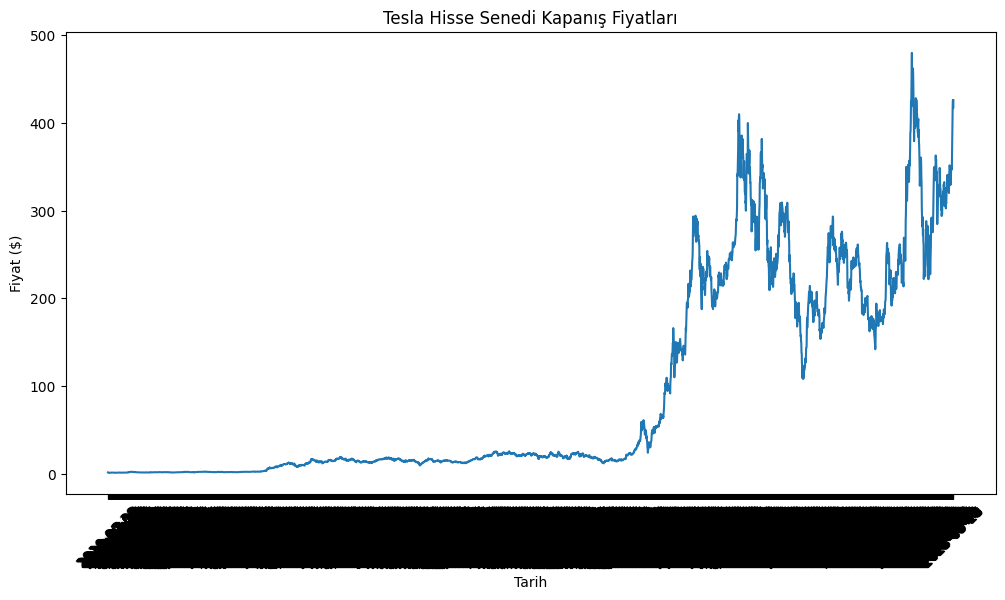

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df["Date"], df["Close"])
plt.title("Tesla Hisse Senedi Kapanış Fiyatları")
plt.xlabel("Tarih")
plt.ylabel("Fiyat ($)")
plt.xticks(rotation=45)
plt.show()

In [14]:
df["Prev_Close"] = df["Close"].shift(1)
df = df.dropna()

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df[["Prev_Close"]]
y = df["Close"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

R² Score: 0.9976660637800823
RMSE: 5.5324853063910435


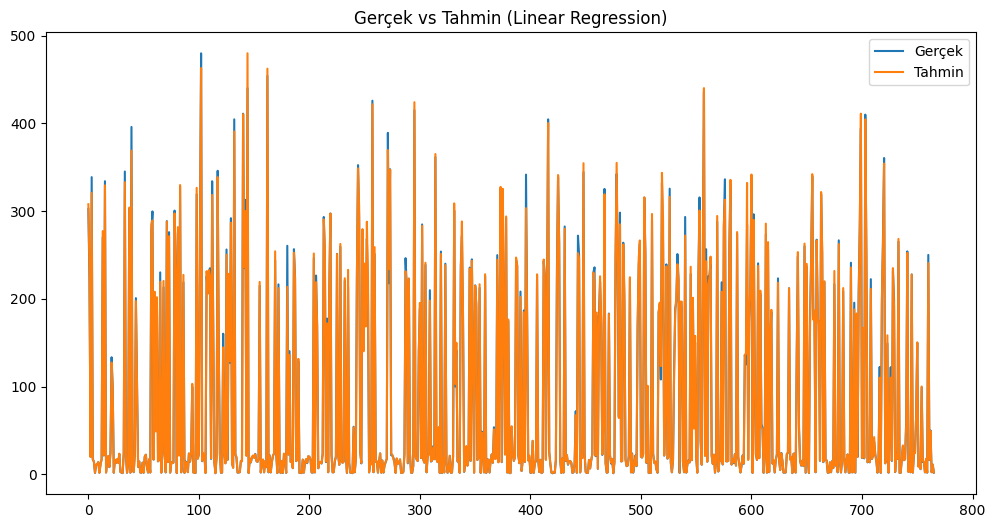

In [16]:
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label="Gerçek")
plt.plot(y_pred, label="Tahmin")
plt.title("Gerçek vs Tahmin (Linear Regression)")
plt.legend()
plt.show()

## 📊 Sonuçlar

- Linear Regression modeli ile R² = 0.9 civarında sonuç elde edildi.  
- Bu, bir önceki günün fiyatının ertesi gün için güçlü bir tahminleyici olduğunu gösteriyor.  

## 💡 Gelecek Çalışmalar
- Random Forest ve LSTM gibi daha karmaşık modeller ile daha yüksek doğruluk sağlanabilir.  
- Gerçek zamanlı API verisi entegre edilerek canlı bir forecasting botu yapılabilir.  